In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import graphviz
from sklearn.tree import export_graphviz

matplotlib.rc("font", family = "Malgun Gothic")


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
from sklearn.tree import export_graphviz

matplotlib.rc("font", family = "Malgun Gothic")

In [3]:
df_raw = pd.read_csv("Telemarketing_Data_cl3.csv", encoding='utf-8-sig' )
df_raw.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,56,5,50_group,주부,0,no,결혼,중졸,없음,없음,...,유선전화,261,1,NaN,0,no,0,2018-01-03,87,life
1,57,5,50_group,서비스종사자,1,yes,결혼,전문학교,미확인,없음,...,유선전화,149,1,NaN,0,no,0,2018-01-03,88,life
2,37,3,30_group,서비스종사자,1,yes,결혼,전문학교,없음,대출있음,...,유선전화,226,1,NaN,0,no,0,2018-01-03,89,life
3,40,4,40_group,회사원,1,yes,결혼,검정고시,없음,없음,...,유선전화,151,1,NaN,0,no,0,2018-01-03,90,life
4,56,5,50_group,서비스종사자,1,yes,결혼,전문학교,없음,없음,...,유선전화,307,1,NaN,0,no,0,2018-01-03,91,life


In [4]:
df_raw_20 = df_raw[df_raw["new_age_group"]=="1020_group"]
df_raw_20.head()

,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,주택대출여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
8,24,2,1020_group,기술자,1,yes,미혼,석박사,없음,대출있음,...,유선전화,380,1,NaN,0,no,0,2018-01-04,95,life
9,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,50,1,NaN,0,no,0,2018-01-04,96,life
11,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,대출있음,...,유선전화,222,1,NaN,0,no,0,2018-01-05,98,life
12,29,2,1020_group,산업노동자,1,yes,미혼,전문학교,없음,없음,...,유선전화,137,1,NaN,0,no,0,2018-01-05,99,life
59,25,2,1020_group,기술자,1,yes,미혼,대졸학사,없음,대출있음,...,유선전화,174,1,NaN,0,no,0,2018-01-17,146,onlineShopping


In [5]:
df_raw_20 = pd.DataFrame(df_raw_20).reset_index()

In [6]:
df_raw_20.head()

,index,연령,age_group,new_age_group,직업군,economic_group,economic_group_dummy,결혼여부,학력,신용카드소지여부,...,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,success,연락일자,카드종류,card_category
0,8,24,2,1020_group,기술자,1,yes,미혼,석박사,없음,...,유선전화,380,1,NaN,0,no,0,2018-01-04,95,life
1,9,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,...,유선전화,50,1,NaN,0,no,0,2018-01-04,96,life
2,11,25,2,1020_group,서비스종사자,1,yes,미혼,전문학교,없음,...,유선전화,222,1,NaN,0,no,0,2018-01-05,98,life
3,12,29,2,1020_group,산업노동자,1,yes,미혼,전문학교,없음,...,유선전화,137,1,NaN,0,no,0,2018-01-05,99,life
4,59,25,2,1020_group,기술자,1,yes,미혼,대졸학사,없음,...,유선전화,174,1,NaN,0,no,0,2018-01-17,146,onlineShopping


In [7]:
y = df_raw_20["success"]
df_X = df_raw_20.drop(["success", "age_group","economic_group","economic_group_dummy", "계약여부", "카드종류", "p_days", "연락일자","index"], axis =1)
X = pd.get_dummies(df_X)

In [8]:
X.columns

Index(['연령', '통화시간', '연락시도횟수', '과거통화횟수', 'new_age_group_1020_group', '직업군_공무원',
       '직업군_기술자', '직업군_기업가', '직업군_미취업자', '직업군_미확인', '직업군_산업노동자', '직업군_서비스종사자',
       '직업군_은퇴', '직업군_자영업자', '직업군_주부', '직업군_학생', '직업군_회사원', '결혼여부_결혼',
       '결혼여부_미혼', '결혼여부_미확인', '결혼여부_이혼', '학력_검정고시', '학력_고졸', '학력_대졸학사',
       '학력_미확인', '학력_석박사', '학력_전문학교', '학력_중졸', '신용카드소지여부_미확인', '신용카드소지여부_없음',
       '주택대출여부_대출있음', '주택대출여부_미확인', '주택대출여부_없음', '개인대출여부_대출있음', '개인대출여부_미확인',
       '개인대출여부_없음', 'contact_유선전화', 'contact_휴대폰', 'card_category_comm',
       'card_category_culture', 'card_category_finance', 'card_category_food',
       'card_category_life', 'card_category_oil',
       'card_category_onlineShopping', 'card_category_shopping',
       'card_category_travel'],
      dtype='object')

In [9]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: randomseed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, y
                                                               , test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y .shape))


train data X size : (3968, 47)
train data Y size : (3968,)
test data X size : (1701, 47)
test data Y size : (1701,)


In [10]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.793


In [11]:
tree_uncustomized

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [12]:
para_depth = [depth * 1 for depth in range(1,11)] 
para_split = [n_split*10 for n_split in range(1,11)]
para_leaf = [n_split*2 for n_split in range(1,11)]

estimator = DecisionTreeClassifier()
# 구하고자 하느 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, 
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=90,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 90}

best score: 
0.848


In [13]:
tree_final = DecisionTreeClassifier(max_depth = 8, min_samples_split = 90, min_samples_leaf = 12, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=90,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [14]:
# 변수명 저장
v_feature_name = df_train_x.columns
v_feature_name

Index(['연령', '통화시간', '연락시도횟수', '과거통화횟수', 'new_age_group_1020_group', '직업군_공무원',
       '직업군_기술자', '직업군_기업가', '직업군_미취업자', '직업군_미확인', '직업군_산업노동자', '직업군_서비스종사자',
       '직업군_은퇴', '직업군_자영업자', '직업군_주부', '직업군_학생', '직업군_회사원', '결혼여부_결혼',
       '결혼여부_미혼', '결혼여부_미확인', '결혼여부_이혼', '학력_검정고시', '학력_고졸', '학력_대졸학사',
       '학력_미확인', '학력_석박사', '학력_전문학교', '학력_중졸', '신용카드소지여부_미확인', '신용카드소지여부_없음',
       '주택대출여부_대출있음', '주택대출여부_미확인', '주택대출여부_없음', '개인대출여부_대출있음', '개인대출여부_미확인',
       '개인대출여부_없음', 'contact_유선전화', 'contact_휴대폰', 'card_category_comm',
       'card_category_culture', 'card_category_finance', 'card_category_food',
       'card_category_life', 'card_category_oil',
       'card_category_onlineShopping', 'card_category_shopping',
       'card_category_travel'],
      dtype='object')

In [15]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["Good", "Bad"],
               feature_names= v_feature_name, impurity = True, filled = True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

UnicodeDecodeError: 'cp949' codec can't decode byte 0xed in position 77: illegal multibyte sequence

In [16]:
y_pred = tree_final.predict(df_test_x)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_class)))


Accuracy: 0.847

Confustion matrix: 
[[1360   49]
 [ 212   80]]


### feature importances: 설명변수의 중요도

In [17]:

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# feature_importances의 테이블 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,통화시간,0.565
3,과거통화횟수,0.179
15,직업군_학생,0.081
36,contact_유선전화,0.055
0,연령,0.028
23,학력_대졸학사,0.028
10,직업군_산업노동자,0.018
28,신용카드소지여부_미확인,0.016
2,연락시도횟수,0.007
45,card_category_shopping,0.006


Text(0, 0.5, '설명변수')

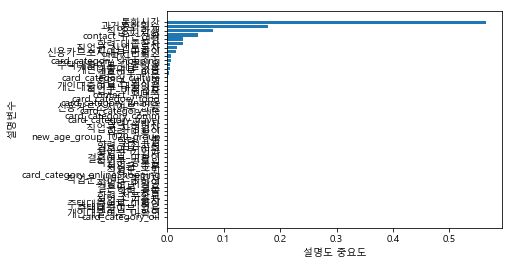

In [18]:

# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림.
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [19]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance["Importance"][:6]

1     0.565279
3     0.179293
15    0.081152
36    0.054872
0     0.028230
23    0.028032
Name: Importance, dtype: float64

Text(0, 0.5, '설명변수')

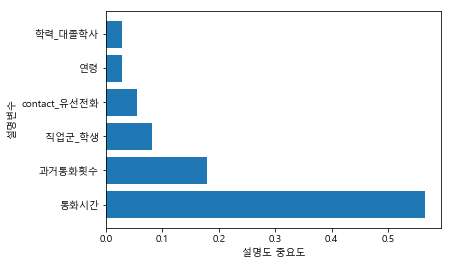

In [20]:
df_importance.sort_values("Importance", ascending = False, inplace = True)
coordinates = range(6)
plt.barh(y = coordinates, width = df_importance["Importance"][:6])
plt.yticks(coordinates, df_importance["Feature"][:6])
plt.xlabel("설명도 중요도")
plt.ylabel("설명변수")

In [21]:
### 의사결정나무를 통해서 영향력이 높은 요인을 찾아보았다.
### 1) 통화시간 (0.565279)
### 2) 과거통화횟수 ( 0.179293)
### 3) 직업군_학생(0.081152)

In [22]:
# train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth * 1 for depth in range(1,11)] #참조: para_depth: [1,2,3,...,10]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth= v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy

In [23]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(df_test_y, y_pred)
cnf_matrix


array([[1360,   49],
       [ 212,   80]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

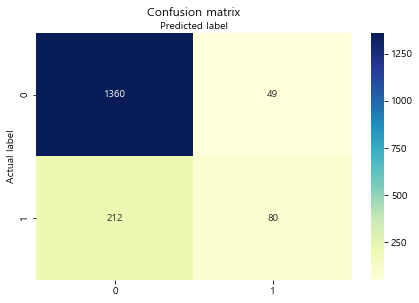

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(df_test_y, y_pred))
print("Precision:",metrics.precision_score(df_test_y, y_pred))
print("Recall:",metrics.recall_score(df_test_y, y_pred))

Accuracy: 0.8465608465608465
Precision: 0.6201550387596899
Recall: 0.273972602739726


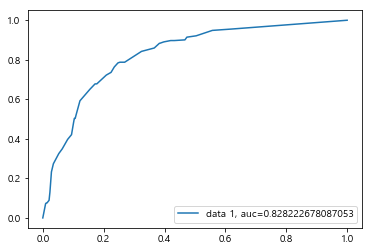

In [26]:
y_pred_proba = tree_final.predict_proba(df_test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(df_test_y,  y_pred_proba)
auc = metrics.roc_auc_score(df_test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
f1_score(df_test_y, y_pred)

0.38004750593824227